### Data Loading and preprocessing

In [2]:
%matplotlib inline
import os
import pandas as pd
import requests
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
import ast

In [33]:
# load data

characters = pd.read_csv('./data/character.metadata.tsv', sep='\t', 
                         names=['wiki_movie_id', 'free_movie_id', 'release', 'char_name', 'actor_birth', 'actor_gender', 'actor_height',
                                 'actor_ethnicity', 'actor_name', 'age_at_release', 'free_map_id', 'free_char_id', 'free_actor_id'] )
movies = pd.read_csv('./data/movie.metadata.tsv', sep='\t', names=['wiki_movie_id', 'free_movie_id', 'movie_name', 'release', 
                                                                   'box_office', 'runtime', 'languages', 'countries', 'genres'])
summaries = df = pd.read_csv('./data/plot_summaries.txt', delimiter='\t', header=None, names=['movie_id', 'plot_summary'], encoding='utf-8')

In [34]:
print(characters.shape)
print(movies.shape)
print(summaries.shape)

(450669, 13)
(81741, 9)
(42303, 2)


#### Data exploration

In [5]:
characters.head()

,wiki_movie_id,free_movie_id,release,char_name,actor_birth,actor_gender,actor_height,actor_ethnicity,actor_name,age_at_release,free_map_id,free_char_id,free_actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [6]:
movies.head()

,wiki_movie_id,free_movie_id,movie_name,release,box_office,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [7]:
# Standardize 'release' column to only keep the year
def extract_year(release_date):
    try:
        # Attempt to convert to datetime and extract the year
        year = pd.to_datetime(release_date, errors='coerce').year
        if pd.notna(year):
            return year
        # If conversion fails, try extracting just the first 4 digits as year
        return int(str(release_date)[:4])
    except:
        return None

movies['release'] = movies['release'].apply(extract_year)
movies.head()


,wiki_movie_id,free_movie_id,movie_name,release,box_office,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001.0,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988.0,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987.0,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983.0,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [8]:
summaries.head()

,movie_id,plot_summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [35]:
print(characters.isnull().sum())

wiki_movie_id           0
free_movie_id           0
release              9995
char_name          257875
actor_birth        106145
actor_gender        45609
actor_height       295845
actor_ethnicity    344611
actor_name           1228
age_at_release     158113
free_map_id             0
free_char_id       257865
free_actor_id         815
dtype: int64


In [36]:
# Calculate the number and percentage of NaN values in the 'actor_ethnicity' column
total_rows = len(characters)
nans_in_ethnicity = characters['actor_ethnicity'].isnull().sum()
nan_percentage = (nans_in_ethnicity / total_rows) * 100

print(f"Number of NaN values in 'actor_ethnicity': {nans_in_ethnicity}")
print(f"Percentage of NaN values in 'actor_ethnicity': {nan_percentage:.2f}%")

Number of NaN values in 'actor_ethnicity': 344611
Percentage of NaN values in 'actor_ethnicity': 76.47%


In [10]:
print(movies.isnull().sum())

wiki_movie_id        0
free_movie_id        0
movie_name           0
release           6902
box_office       73340
runtime          20450
languages            0
countries            0
genres               0
dtype: int64


In [11]:
print(summaries.isnull().sum())

movie_id        0
plot_summary    0
dtype: int64


#### Data cleaning 

In [12]:
# drop columns that are non relevant for our analysis 
characters.drop(columns=['char_name'], inplace=True)
characters.drop(columns=['actor_height'], inplace=True)
movies.drop(columns=['runtime'], inplace= True)

In [13]:
# handling missing values for characters
# dropping them for char_name, actor_name because non relevant for our analysis
# filling the nans for the others 

characters.dropna(subset=['release'], inplace=True)
characters.dropna(subset=['actor_name'], inplace=True)

characters['actor_birth'] = pd.to_datetime(characters['actor_birth'], errors='coerce')
characters['actor_birth_year'] = characters['actor_birth'].dt.year
characters['actor_birth_year'] = characters['actor_birth_year'].fillna(characters['actor_birth_year'].median())
characters.drop(columns=['actor_birth'], inplace=True)

characters['actor_gender'] = characters['actor_gender'].fillna('Unknown')
characters['actor_ethnicity'] = characters['actor_ethnicity'].fillna('Unknown')
characters['age_at_release'] = characters['age_at_release'].fillna(characters['age_at_release'].median())


In [14]:
# handling missing values for movies

movies.dropna(subset=['release'], inplace=True)
movies['box_office'] = movies['box_office'].fillna(movies['box_office'].median())
movies.head()

,wiki_movie_id,free_movie_id,movie_name,release,box_office,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001.0,14010832.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,10809846.5,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988.0,10809846.5,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987.0,10809846.5,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983.0,10809846.5,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


#### Ethnicity categorization

In [37]:
# Extract and print unique ethnicities from the `characters` DataFrame
unique_ethnicities = characters['actor_ethnicity'].unique()
print(', '.join([f'\'{ethnicity}\'' for ethnicity in unique_ethnicities]))

'nan', '/m/044038p', '/m/0x67', '/m/064b9n', '/m/041rx', '/m/033tf_', '/m/04gfy7', '/m/0222qb', '/m/01qhm_', '/m/0dryh9k', '/m/048sp5', '/m/04mvp8', '/m/0bzkm2', '/m/02p1pl6', '/m/0bjbszh', '/m/022fdt', '/m/0cqgdq', '/m/0ffkb4', '/m/075dhf0', '/m/01hwt', '/m/0xnvg', '/m/0dqqwy', '/m/048z7l', '/m/07bch9', '/m/09v5bdn', '/m/02w7gg', '/m/03bkbh', '/m/02vsw1', '/m/09kr66', '/m/09vc4s', '/m/0g0x7_', '/m/042gtr', '/m/0cm7w1', '/m/046cwm', '/m/04dbw3', '/m/02ctzb', '/m/0g8_vp', '/m/092h2qt', '/m/0g6ff', '/m/0278pqj', '/m/0301y_', '/m/019kn7', '/m/0cnvdq1', '/m/03295l', '/m/065b6q', '/m/03pqwy', '/m/01xhh5', '/m/03ts0c', '/m/06gbnc', '/m/07hwkr', '/m/0bpjh3', '/m/0fpjs3j', '/m/04nrnz', '/m/09k5jvk', '/m/07mqps', '/m/08hpk0', '/m/03ttfc', '/m/0d9q7j', '/m/075_n6', '/m/0dllcfn', '/m/04kbvpz', '/m/03ftx7', '/m/0747611', '/m/025rpb0', '/m/06mvq', '/m/047l_90', '/m/029f2r', '/m/01rv7x', '/m/05sf2x', '/m/01336l', '/m/0bh91q8', '/m/01g7zj', '/m/0cn68', '/m/02sch9', '/m/0fqp6zk', '/m/02y_9mh', '/m/0d7

In [38]:
# Sample Freebase IDs (add your full list here)
freebase_ids = ['Unknown', '/m/044038p', '/m/0x67', '/m/064b9n', '/m/041rx', '/m/033tf_', '/m/04gfy7', '/m/0222qb', '/m/01qhm_', 
                '/m/0dryh9k', '/m/048sp5', '/m/04mvp8', '/m/0bzkm2', '/m/02p1pl6', '/m/0bjbszh', '/m/022fdt', '/m/0cqgdq', '/m/0ffkb4', 
                '/m/075dhf0', '/m/01hwt', '/m/0xnvg', '/m/0dqqwy', '/m/048z7l', '/m/07bch9', '/m/09v5bdn', '/m/02w7gg', '/m/03bkbh', '/m/02vsw1', 
                '/m/09kr66', '/m/09vc4s', '/m/0g0x7_', '/m/042gtr', '/m/0cm7w1', '/m/046cwm', '/m/04dbw3', '/m/02ctzb', '/m/0g8_vp', '/m/092h2qt',
                  '/m/0g6ff', '/m/0278pqj', '/m/0301y_', '/m/019kn7', '/m/0cnvdq1', '/m/03295l', '/m/065b6q', '/m/03pqwy', '/m/01xhh5', '/m/03ts0c', 
                  '/m/06gbnc', '/m/07hwkr', '/m/0bpjh3', '/m/0fpjs3j', '/m/04nrnz', '/m/09k5jvk', '/m/07mqps', '/m/08hpk0', '/m/03ttfc', '/m/0d9q7j',
                    '/m/075_n6', '/m/0dllcfn', '/m/04kbvpz', '/m/03ftx7', '/m/0747611', '/m/025rpb0', '/m/06mvq', '/m/047l_90', '/m/029f2r', '/m/01rv7x',
                      '/m/05sf2x', '/m/01336l', '/m/0bh91q8', '/m/01g7zj', '/m/0cn68', '/m/02sch9', '/m/0fqp6zk', '/m/02y_9mh', '/m/0d7wh', '/m/0g96wd', 
                      '/m/047948f', '/m/04ggbzy', '/m/04q7gbh', '/m/013xrm', '/m/0gkxl2', '/m/0dbxy', '/m/0cmdl5l', '/m/0268d21', '/m/0912ll', '/m/022dp5', '/m/019lrz', '/m/03bx0k4', '/m/02p_gby', '/m/012c1l', '/m/04y29', '/m/09743', '/m/03w9bjf', '/m/09m6hr', '/m/0583cz', '/m/02g7sp', '/m/063k3h', '/m/071x0k', '/m/0bhsnb', '/m/0bkbz', '/m/0f0gt_', '/m/0283js_', '/m/01kg2v', '/m/0828vj', '/m/08v2k7', '/m/03gskx0', '/m/0h2138', '/m/0fng3k', '/m/023mqw', '/m/0222hg', '/m/06fczy', '/m/03lmx1', '/m/03vv99', '/m/09zyn5', '/m/0470lk', '/m/0fj1k9', '/m/03cbkrf', '/m/0bbz66j', '/m/0268_k', '/m/04dzwby', '/m/04y8_bm', '/m/0ffhz3', '/m/0ffj5g', '/m/06j2v', '/m/03cjjy0', '/m/06v41q', '/m/032j30', '/m/01n94b', '/m/0d2by', '/m/038723', '/m/0g5y6', '/m/09cqth', '/m/0bymc', '/m/0d8qh0', '/m/0c2hxm', '/m/04znbg', '/m/027n1m6', '/m/09vmyh', '/m/02czfr', '/m/0g48m4', '/m/01swvz', '/m/04tvpv', '/m/0462jl6', '/m/025_0f0', '/m/0j6x8', '/m/05ysft4', '/m/01ylpf', '/m/0bnzjx', '/m/04f581', '/m/0ch3pqf', '/m/02p4q5p', '/m/02wcbj_', '/m/02jvpv', '/m/08gzsf', '/m/02p444n', '/m/07j80c', '/m/0btrm4', '/m/04608z', '/m/065z7w_', '/m/0b0gzf', '/m/033njm', '/m/02rbdlq', '/m/01xttr', '/m/062_25', '/m/01nbcy', '/m/02cm28', '/m/0fqz6', '/m/047bp1r', '/m/0bs7l_v', '/m/02qv_h_', '/m/0dv5vw', '/m/026c9dq', '/m/0b__fv3', '/m/018s6c', '/m/03yk6g', '/m/05l3g_', '/m/0ckk60', '/m/0bfjm7', '/m/04jq32s', '/m/0790v', '/m/01trsl', '/m/03cdk7b', '/m/02q206y', '/m/05g0f1', '/m/067lwk', '/m/05748', '/m/033qxt', '/m/097nms', '/m/04czx7', '/m/08xbxs', '/m/0432mrk', '/m/059_w', '/m/0289z8v', '/m/013b6_', '/m/03f3sf', '/m/017sq0', '/m/04_hr_', '/m/071drf', '/m/0hbz9xw', '/m/01j2qv', '/m/0640_7q', '/m/02p656s', '/m/0dj8k3', '/m/0466nw8', '/m/07d_p8', '/m/078vc', '/m/09gp4', '/m/06lshc', '/m/0404kdr', '/m/016f5d', '/m/04mmhj', '/m/067lts', '/m/0761bp', '/m/0bbcnlt', '/m/06rd7', '/m/095mw2', '/m/09y7x4', '/m/08cjt2', '/m/013s3n', '/m/0g4pffv', '/m/09gk_6h', '/m/034s7b', '/m/0987ctr', '/m/04_bc8', '/m/0b98sy', '/m/0ffjqy', '/m/0fk1z', '/m/074w_m', '/m/03cl2pz', '/m/07gzw5', '/m/086wp0', '/m/01g0y_', '/m/04k02l', '/m/02p7gyv', '/m/03sx6v', '/m/0bfrrj', '/m/02pzb09', '/m/052r3t', '/m/0268pvf', '/m/013s2p', '/m/09chmw', '/m/0ft9bs', '/m/013b7g', '/m/02r_qms', '/m/0cx3p', '/m/026cybk', '/m/04ydrsn', '/m/067lrj', '/m/0c3wsgg', '/m/04zjjt', '/m/0180zw', '/m/0hj35', '/m/025tvhm', '/m/01p7s6', '/m/02rp50t', '/m/025x6k1', '/m/0150zs', '/m/0j4w_', '/m/0br_8h', '/m/0266mf0', '/m/03cnzsg', '/m/04hlx1', '/m/0288fw3', '/m/02vkw95', '/m/0fq6zlv', '/m/01sq7s', '/m/03r_k', '/m/0fk3s', '/m/046j25', '/m/0338zd', '/m/027lf0d', '/m/0152s7', '/m/03d19xz', '/m/0520604', '/m/04_tz7', '/m/01vsch', '/m/01d7kx', '/m/051wcch', '/m/09lz9zx', '/m/0738n4', '/m/0ffjvd', '/m/051x6yk', '/m/05sycg', '/m/0fp54b', '/m/027vy0s', '/m/0gf5k1', '/m/0dc58y8', '/m/07g8yp', '/m/0444sm4', '/m/0318mh', '/m/07hyjp', '/m/01c034', '/m/09fqz7', '/m/03ndvw', '/m/0b79c7', '/m/0665pp', '/m/03d26m9', '/m/04lhn7b', '/m/03h1dq9', '/m/0152wh', '/m/0cc5y74', '/m/012f86', '/m/0h6mqq9', '/m/03wbmrc', '/m/0dqrh8', '/m/07n8wy', '/m/01267', '/m/01mw1s', '/m/02gx2x', '/m/03x_lpj', '/m/02rm7_9', '/m/04csgrq', '/m/05qb937', '/m/05vhv7', '/m/078ds', '/m/0dq1q', '/m/04wy6k', '/m/03vghh', '/m/065577s', '/m/04l_pt', '/m/0d32d1', '/m/0c41n', '/m/03ck8x1', '/m/09snp5', '/m/0fxmtg', '/m/0268xtg', '/m/026kx7g', '/m/09tqq8q', '/m/03kbr', '/m/05c60ml', '/m/05mtdy', '/m/064pj', '/m/026zlyd', '/m/08yg47', '/m/03x_fq7', '/m/06k6sl', '/m/0b8yvr', '/m/01tyl3', '/m/04sfz4s', '/m/02vkd28', '/m/0647lm', '/m/0bvnws', '/m/07lv5x', '/m/02r3wfk', '/m/02qv716', '/m/0h8mzsl', '/m/01nft3', '/m/031_sd', '/m/0ffhvl', '/m/07s49c2', '/m/03hf_6z', '/m/0d8qls', '/m/03fk0c', '/m/01crfj', '/m/0h1nk0k', '/m/01flqq', '/m/021pd', '/m/0bms44', '/m/07s9g04', '/m/03ty8_', '/m/02rdfpy', '/m/03fvrb', '/m/04pnf', '/m/0bvjpj', '/m/039z49', '/m/01_5cg', '/m/01ywdy', '/m/03q819', '/m/025xss1', '/m/0c29q8', '/m/013s41', '/m/03x1x', '/m/05cc9h', '/m/03m9my8', '/m/0165md', '/m/0g44f5', '/m/0gtwjz6', '/m/01hm_', '/m/03zcwh', '/m/0bns36b', '/m/04lgl9t', '/m/0g5k7qv', '/m/067lv3', '/m/0ftlzz', '/m/02r11hz', '/m/06y24j', '/m/02m0kh', '/m/01l0ty', '/m/03cmqbt', '/m/0g5rkt4', '/m/02dd5z', '/m/01gr8h', '/m/01vr3v', '/m/09g34_', '/m/09cd0m', '/m/03h11s3', '/m/05ms3p0', '/m/04lfc70', '/m/06dy2k', '/m/013z8m', '/m/0ftwg', '/m/0fk55', '/m/06bkf', '/m/0c_lbq', '/m/0301xt', '/m/01kb9y', '/m/042199j', '/m/03m3p6w', '/m/0br_9j', '/m/032m0b', '/m/05y2yj', '/m/01f9bg', '/m/04hqxn', '/m/068y7m', '/m/0ffk5n', '/m/03gy1h2', '/m/04wysy', '/m/04fh1b', '/m/02vys3l', '/m/044bp_', '/m/0dtkkb', '/m/0fp4n', '/m/0166vx', '/m/047q05d', '/m/0c50f', '/m/01srl7', '/m/0fpxlz9', '/m/03lnnd', '/m/02pj9yr', '/m/04118b', '/m/0xff', '/m/0bdynxs', '/m/01gby2', '/m/0dn1_0', '/m/062szv5', '/m/062zk4r', '/m/0960kn',
                 '/m/043_z22', '/m/097r55', '/m/035b50', '/m/01hphz', '/m/033fjj', '/m/0b3zsn', '/m/04lhnps', '/m/08c25t', '/m/05sng', '/m/05bzpzx', '/m/064rb5l', '/m/01km_m', '/m/059v8', '/m/03b_13l', '/m/09c8kp', '/m/05ztd1', '/m/04c28', '/m/0463n9y', '/m/04jtjvt', '/m/01h4n', '/m/03hjx6f', '/m/027936c', '/m/06w4lv', '/m/03nvq', '/m/03nz70', '/m/01g3rx', '/m/02wz7j', '/m/04kdwcx', '/m/04_8lfc', '/m/033qt1', '/m/08j1fb', '/m/07wsyr', '/m/06vb7b', '/m/012fh', '/m/0dm3xpw', '/m/09r2kh', '/m/02ry8mk', '/m/029q52', '/m/026d074']

# Function to split the list into batches
def split_into_batches(lst, batch_size):
    for i in range(0, len(lst), batch_size):
        yield lst[i:i + batch_size]

# Create an empty dictionary to store the mappings
freebase_to_wikidata_mapping = {}

# Iterate over batches of Freebase IDs
batch_size = 50  # Set batch size to 50 to avoid long URL issues
for batch in split_into_batches(freebase_ids, batch_size):
    # Create a batch SPARQL query
    query = """
    SELECT ?freebase_id ?item ?itemLabel WHERE {
      VALUES ?freebase_id {""" + " ".join([f'"{fb_id}"' for fb_id in batch]) + """}
      ?item wdt:P646 ?freebase_id.
      SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
    }
    """

    # Endpoint for Wikidata SPARQL
    url = "https://query.wikidata.org/sparql"
    headers = {
        "User-Agent": "Mozilla/5.0",
        "Accept": "application/json"
    }

    # Send the request to Wikidata
    response = requests.get(url, headers=headers, params={"query": query, "format": "json"})

    # Check the status and response
    if response.status_code == 200:
        data = response.json()
        if 'results' in data and 'bindings' in data['results']:
            for result in data['results']['bindings']:
                freebase_id = result['freebase_id']['value']
                wikidata_id = result['item']['value'].split('/')[-1]
                label = result['itemLabel']['value']
                freebase_to_wikidata_mapping[freebase_id] = {
                    "wikidata_id": wikidata_id,
                    "label": label
                }
        else:
            print("No valid data found in response for this batch.")
    else:
        print(f"Error: Received status code {response.status_code} for batch starting with {batch[0]}")

# Print the dictionary to verify the mapping
print("Mappings successfully retrieved:")
for fb_id, details in freebase_to_wikidata_mapping.items():
    print(f"Freebase ID: {fb_id}, Wikidata ID: {details['wikidata_id']}, Label: {details['label']}")


Mappings successfully retrieved:
Freebase ID: /m/02vsw1, Wikidata ID: Q43103, Label: European Americans
Freebase ID: /m/064b9n, Wikidata ID: Q120601, Label: Omaha Tribe of Nebraska
Freebase ID: /m/01qhm_, Wikidata ID: Q141817, Label: German Americans
Freebase ID: /m/0bzkm2, Wikidata ID: Q707133, Label: Taiwanese people
Freebase ID: /m/09kr66, Wikidata ID: Q1140588, Label: Russian Americans
Freebase ID: /m/046cwm, Wikidata ID: Q1255534, Label: Nair
Freebase ID: /m/09vc4s, Wikidata ID: Q1344183, Label: English Americans
Freebase ID: /m/0278pqj, Wikidata ID: Q21999799, Label: British Nigerian
Freebase ID: /m/03ts0c, Wikidata ID: Q121842, Label: French
Freebase ID: /m/0301y_, Wikidata ID: Q190168, Label: Yoruba people
Freebase ID: /m/048z7l, Wikidata ID: Q678551, Label: American Jews
Freebase ID: /m/033tf_, Wikidata ID: Q1075293, Label: Irish Americans
Freebase ID: /m/019kn7, Wikidata ID: Q31340083, Label: Q31340083
Freebase ID: /m/02w7gg, Wikidata ID: Q42406, Label: English people
Freebas

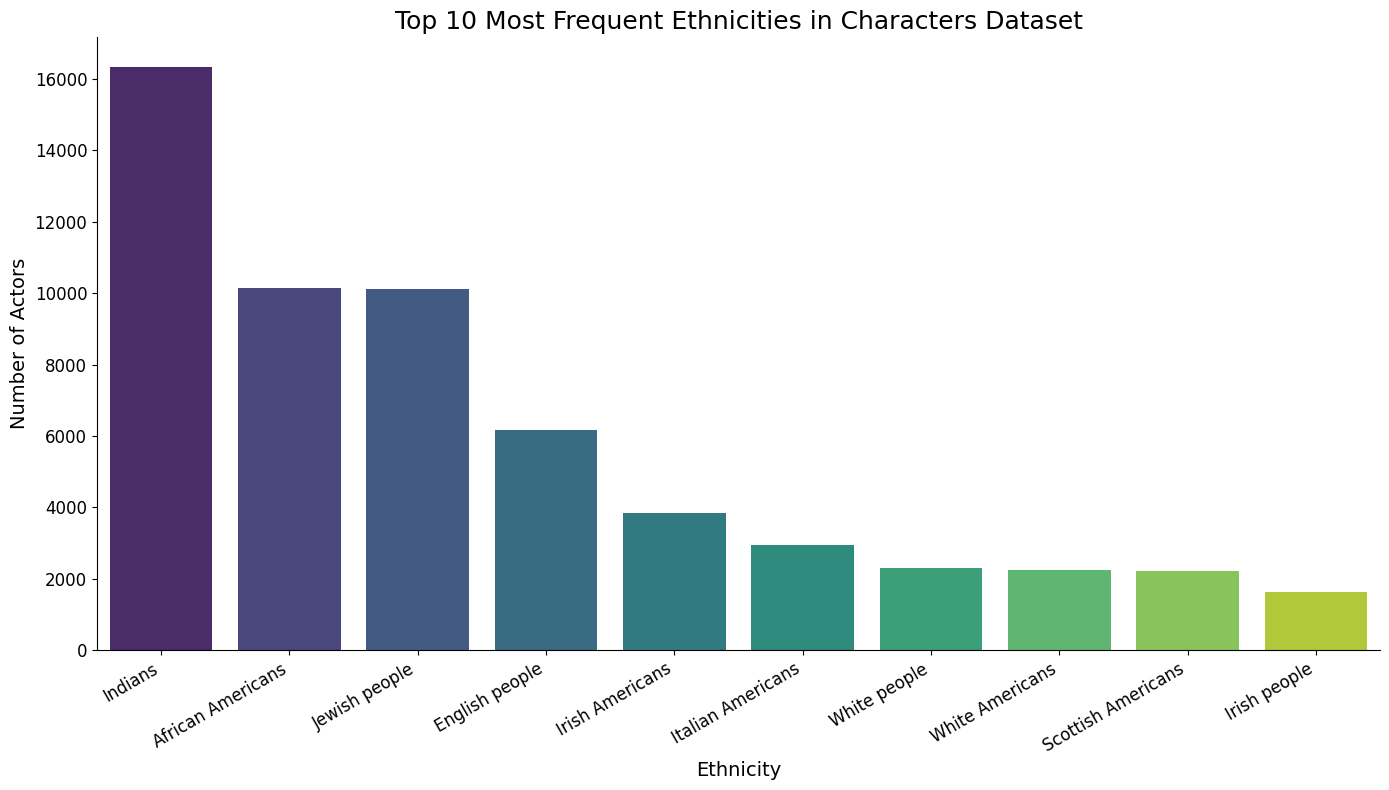

In [39]:
# Assign labels for ethnicity using the batch lookup dictionary
characters['actor_ethnicity_label'] = characters['actor_ethnicity'].map(
    lambda x: freebase_to_wikidata_mapping.get(x, {}).get('label', 'Unknown')
)

# Group by ethnicity and count the occurrences, excluding 'Unknown'
ethnicity_counts = characters[characters['actor_ethnicity_label'] != 'Unknown']['actor_ethnicity_label'].value_counts()

# Select the top 10 most frequent ethnicities
top_ethnicities = ethnicity_counts.head(10)

# Plotting the distribution of the top 10 ethnicities using a bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x=top_ethnicities.index, y=top_ethnicities.values, palette='viridis', hue=top_ethnicities.index, legend=False)
plt.title('Top 10 Most Frequent Ethnicities in Characters Dataset', fontsize=18)
plt.xlabel('Ethnicity', fontsize=14)
plt.ylabel('Number of Actors', fontsize=14)
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()


In [40]:
# Calculate the number and percentage of 'Unknown' values in the 'actor_ethnicity_label' column
unknown_ethnicity_count = (characters['actor_ethnicity_label'] == 'Unknown').sum()
unknown_percentage = (unknown_ethnicity_count / total_rows) * 100

print(f"Number of 'Unknown' values in 'actor_ethnicity_label': {unknown_ethnicity_count}")
print(f"Percentage of 'Unknown' values in 'actor_ethnicity_label': {unknown_percentage:.2f}%")

Number of 'Unknown' values in 'actor_ethnicity_label': 347768
Percentage of 'Unknown' values in 'actor_ethnicity_label': 77.17%


In [18]:
merged_data = pd.merge(characters, movies, on='wiki_movie_id', how='inner')
merged_data.head()

,wiki_movie_id,free_movie_id_x,release_x,actor_gender,actor_ethnicity,actor_name,age_at_release,free_map_id,free_char_id,free_actor_id,actor_birth_year,actor_ethnicity_label,free_movie_id_y,movie_name,release_y,box_office,languages,countries,genres
0,975900,/m/03vyhn,2001-08-24,F,Unknown,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,1958.0,Unknown,/m/03vyhn,Ghosts of Mars,2001.0,14010832.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,975900,/m/03vyhn,2001-08-24,F,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,1974.0,Unknown,/m/03vyhn,Ghosts of Mars,2001.0,14010832.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
2,975900,/m/03vyhn,2001-08-24,M,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,1969.0,African Americans,/m/03vyhn,Ghosts of Mars,2001.0,14010832.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
3,975900,/m/03vyhn,2001-08-24,M,Unknown,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,1967.0,Unknown,/m/03vyhn,Ghosts of Mars,2001.0,14010832.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
4,975900,/m/03vyhn,2001-08-24,F,Unknown,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,1977.0,Unknown,/m/03vyhn,Ghosts of Mars,2001.0,14010832.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."


In [19]:
east_asian_countries = ['China', 'Japan', 'Mongolia', 'Hong Kong', 'South Korea', 'Taiwan']

# Create a regular expression pattern to match any of these countries
east_asian_pattern = '|'.join(east_asian_countries)

# Extract all movies in East Asia using the pattern
east_asian_movies = movies[
    movies['countries'].str.contains(east_asian_pattern, case=False, na=False)
]

print(f"Number of East Asian movies: {len(east_asian_movies)}")


Number of East Asian movies: 4744


In [20]:
# Save the filtered East Asian movies metadata for future use
east_asian_movies.to_csv('data/east_asian.movie.metadata.tsv', sep='\t', index=False)
print("East Asian movies metadata saved.")

East Asian movies metadata saved.


In [21]:
east_asian_movies.head()

,wiki_movie_id,free_movie_id,movie_name,release,box_office,languages,countries,genres
11,24229100,/m/07kjkz6,Lady Snowblood 2: Love Song of Vengeance,1974.0,10809846.5,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th..."
43,26878691,/m/0f400r,Mysterious Island,1982.0,10809846.5,"{""/m/0653m"": ""Standard Mandarin""}","{""/m/03h64"": ""Hong Kong""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/08322"":..."
56,13281430,/m/03c0d85,My Name is Fame,2006.0,10809846.5,"{""/m/012w70"": ""Cantonese"", ""/m/0459q4"": ""Stand...","{""/m/03h64"": ""Hong Kong""}","{""/m/07s9rl0"": ""Drama"", ""/m/0gw5qqq"": ""Chinese..."
108,24196090,/m/07k8x7p,The World of Geisha,1973.0,10809846.5,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/0hj3n16"": ""Erotic Drama"", ""/m/0gw5n2f"": ""..."
114,17780234,/m/0479c20,Banana Club,1996.0,10809846.5,"{""/m/012w70"": ""Cantonese""}","{""/m/03h64"": ""Hong Kong""}","{""/m/0gw5qqq"": ""Chinese Movies""}"


In [22]:
# Extract the Wikipedia movie IDs from the East Asian movies dataset
east_asian_movie_ids = east_asian_movies['wiki_movie_id'].unique()

# Step 3: Filter the character metadata to include only characters from East Asian movies
east_asian_characters = characters[characters['wiki_movie_id'].isin(east_asian_movie_ids)]

# Step 4: Save the filtered East Asian characters metadata for future use
east_asian_characters.to_csv('data/east_asian.character.metadata.tsv', sep='\t', index=False)
print("East Asian characters metadata saved.")

East Asian characters metadata saved.


In [23]:
east_asian_plot_summaries = summaries[summaries['movie_id'].isin(east_asian_movie_ids)]
east_asian_plot_summaries.to_csv('data/east_asian.summaries.metadata.tsv', sep='\t', index=False)
print("East Asian summaries metadata saved.")

East Asian summaries metadata saved.


In [24]:
# Merge the datasets on Wikipedia movie ID (assuming column is named 'wikipedia_movie_id')
east_asian_merged = pd.merge(
    east_asian_movies,
    east_asian_characters,
    left_on='wiki_movie_id', 
    right_on='wiki_movie_id',
    how='inner'
)
east_asian_merged.head()

,wiki_movie_id,free_movie_id_x,movie_name,release_x,box_office,languages,countries,genres,free_movie_id_y,release_y,actor_gender,actor_ethnicity,actor_name,age_at_release,free_map_id,free_char_id,free_actor_id,actor_birth_year,actor_ethnicity_label
0,24229100,/m/07kjkz6,Lady Snowblood 2: Love Song of Vengeance,1974.0,10809846.5,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",/m/07kjkz6,1974,M,Unknown,Juzo Itami,40.0,/m/07lmp51,NaN,/m/02d7rn,1933.0,Unknown
1,24229100,/m/07kjkz6,Lady Snowblood 2: Love Song of Vengeance,1974.0,10809846.5,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",/m/07kjkz6,1974,F,Unknown,Meiko Kaji,26.0,/m/07lmp56,NaN,/m/0576kw,1947.0,Unknown
2,24229100,/m/07kjkz6,Lady Snowblood 2: Love Song of Vengeance,1974.0,10809846.5,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",/m/07kjkz6,1974,M,Unknown,Yoshio Harada,33.0,/m/0crv24c,NaN,/m/0chg_3,1940.0,Unknown
3,24229100,/m/07kjkz6,Lady Snowblood 2: Love Song of Vengeance,1974.0,10809846.5,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",/m/07kjkz6,1974,F,Unknown,Kazuko Yoshiyuki,38.0,/m/0cv_zxf,NaN,/m/05zs55n,1935.0,Unknown
4,24229100,/m/07kjkz6,Lady Snowblood 2: Love Song of Vengeance,1974.0,10809846.5,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",/m/07kjkz6,1974,M,Unknown,Shin Kishida,34.0,/m/0gc9vk1,NaN,/m/03ccs9p,1939.0,Unknown


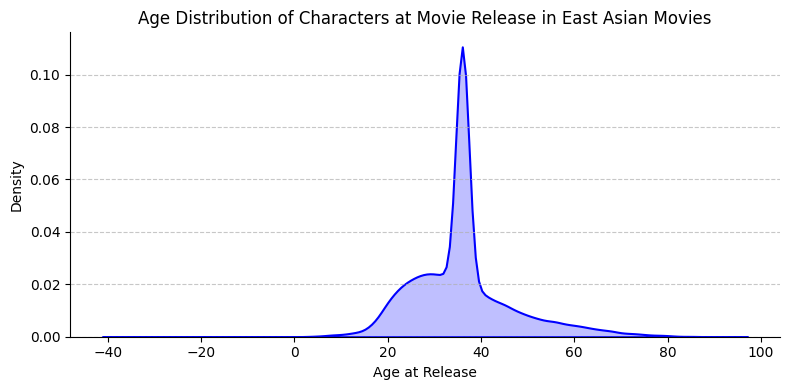

In [25]:
# Plotting a density plot for the age of characters at movie release in the East Asian movies dataset
plt.figure(figsize=(8, 4))

# Extract the 'age_at_release' column for characters from East Asian movies
east_asia_ages = east_asian_merged['age_at_release'].dropna()

# Plot using seaborn's kdeplot with `fill=True` instead of deprecated `shade`
sns.kdeplot(east_asia_ages, fill=True, color='blue', linewidth=1.5)

# Customizing the plot
plt.title('Age Distribution of Characters at Movie Release in East Asian Movies', fontsize=12)
plt.xlabel('Age at Release', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()


In [28]:
# Extract 'age_at_release' after merging
east_asia_ages = east_asian_merged['age_at_release'].dropna()

# Creating an interactive density plot using Plotly
fig = ff.create_distplot([east_asia_ages], ['Age at Release'], show_hist=False, colors=['blue'])

# Customizing the layout of the plot
fig.update_layout(
    title_text='Age Distribution of Characters at Movie Release in East Asian Movies',
    xaxis_title='Age at Release',
    yaxis_title='Density',
    template='plotly_white'
)

# Show the interactive plot
fig.show()


In [27]:
east_asian_merged[east_asian_merged['actor_ethnicity_label']].unique

KeyError: "None of [Index(['Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown',\n       'Unknown', 'Unknown', 'Unknown', 'Unknown',\n       ...\n       'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown',\n       'Unknown', 'Unknown', 'Unknown', 'Unknown'],\n      dtype='object', length=27643)] are in the [columns]"

In [29]:
# Filter the dataset for East Asian ethnicities
east_asian_ethnicities = [
    'Taiwanese people', 'Koreans', 'Japanese Americans', 'Chinese Americans',
    'Hongkongers', 'Chinese Canadians', 'Chinese Singaporeans', 'Vietnamese people',
]
# Filter to include only East Asian movies and East Asian ethnicities
east_asian_actors = east_asian_merged[east_asian_merged['actor_ethnicity_label'].isin(east_asian_ethnicities)]

# Get the value counts of East Asian ethnicities
ethnicity_counts_east_asia = east_asian_actors['actor_ethnicity_label'].value_counts()

# Create the interactive donut chart using Plotly
fig = go.Figure()

fig.add_trace(go.Pie(
    labels=ethnicity_counts_east_asia.index,
    values=ethnicity_counts_east_asia.values,
    hole=0.4,  
    marker=dict(colors=sns.color_palette('Set2', len(ethnicity_counts_east_asia)).as_hex()),
    textinfo='percent+label',
    insidetextfont=dict(size=10, color='black'),
    hoverinfo='label+percent+value'
))

# Update layout for better presentation
fig.update_layout(
    title_text='Distribution of East Asian Actors by Ethnicity in East Asian Movies',
    title_x=0.5,
    annotations=[dict(text='Ethnicities', x=0.5, y=0.5, font_size=16, showarrow=False)],
    legend=dict(
        title='Ethnicities',
        x=1.05,
        y=0.5,
        font=dict(size=9)
    ),
    margin=dict(l=20, r=20, t=40, b=20)  # Reduce margins for better fitting
)

# Show the plot
fig.show()

In [30]:
# Filter the East Asian movies and get the count of male and female characters
gender_counts = east_asian_merged['actor_gender'].value_counts()

# Create the interactive grouped bar chart using Plotly
fig = go.Figure(data=[
    go.Bar(name='Male', x=['Male'], y=[gender_counts.get('M', 0)], marker=dict(color='skyblue')),
    go.Bar(name='Female', x=['Female'], y=[gender_counts.get('F', 0)], marker=dict(color='orange'))
])

fig.update_layout(
    title_text='Distribution of Male and Female Characters in East Asian Movies',
    title_x=0.5,
    barmode='group',  # Grouped bar chart to show the gender comparison
    xaxis_title='Gender',
    yaxis_title='Number of Characters',
    legend=dict(
        title='Gender',
        x=1.05,
        y=0.5,
        font=dict(size=10)
    ),
    xaxis=dict(
        tickvals=['Male', 'Female'],
        tickfont=dict(size=12)
    ),
    margin=dict(l=20, r=20, t=60, b=20),
    yaxis=dict(
        tickformat=',',  # Add comma as a thousands separator if the numbers are large
        title_standoff=10  # Reduces space between axis and title
    ),
    width=700,  
    height=500  
)
# Show the plot
fig.show()


In [118]:
# Function to extract genre names from dictionary-like structure
def extract_genres(genre_str):
    try:
        genre_dict = ast.literal_eval(genre_str)  # Convert string to dictionary
        return list(genre_dict.values())
    except:
        return []

# Apply the function to extract genres for each row
east_asian_merged['genres_list'] = east_asian_merged['genres'].apply(extract_genres)

# Explode the genres_list to have individual rows per genre
east_asian_exploded_genres = east_asian_merged.explode('genres_list')

In [119]:
# Count the number of movies per genre
genre_counts = east_asian_exploded_genres['genres_list'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Set a threshold for minimum movie count to include in the visualization
min_count_threshold = 400  # Adjust this value as needed

# Filter genres to include only those with count greater than or equal to the threshold
filtered_genre_counts = genre_counts[genre_counts['Count'] >= min_count_threshold]

# Create a sunburst chart using Plotly
fig = px.sunburst(
    filtered_genre_counts,
    path=['Genre'],
    values='Count',
    title='Distribution of Genres in East Asian Movies',
    color='Count',
    color_continuous_scale='RdBu',
)

# Customize layout for better readability
fig.update_layout(
    title_x=0.5,
    margin=dict(l=20, r=20, t=60, b=20),
    coloraxis_colorbar=dict(title="Number of Movies"),
)

# Show the plot
fig.show()



In [113]:
# Explode the languages column to create a list of languages
east_asian_movies['languages_list'] = east_asian_movies['languages'].map(lambda x: list(ast.literal_eval(x).values()) if isinstance(x, str) else [])

# Explode the 'languages_list' so that each language appears in its own row
east_asian_exploded_languages = east_asian_movies.explode('languages_list')

In [116]:
# Count the occurrences of each language
language_counts = east_asian_exploded_languages['languages_list'].value_counts().reset_index()
language_counts.columns = ['Language', 'Count']

# Create a treemap using Plotly
fig = px.treemap(
    language_counts,
    path=['Language'],
    values='Count',
    title='Language Representation in East Asian Cinema',
    color='Count',
    color_continuous_scale='RdBu',
)

# Customize layout for better readability
fig.update_layout(
    title_x=0.5,
    margin=dict(l=20, r=20, t=60, b=20),
    coloraxis_colorbar=dict(title="Number of Movies"),
)


# Show the plot
fig.show()


In [127]:
# Define the labels corresponding to East Asian ethnicities
east_asian_ethnicities = [
    'Taiwanese people', 'Koreans', 'Japanese Americans', 'Chinese Americans',
    'Hongkongers', 'Chinese Canadians', 'Chinese Singaporeans', 'Vietnamese people',
]

# Filter the dataset to include only East Asian ethnicities
east_asian_filtered = east_asian_exploded_genres[east_asian_exploded_genres['actor_ethnicity_label'].isin(east_asian_ethnicities)]

# Group by genres and get the count for each genre
top_genres = east_asian_filtered['genres_list'].value_counts().head(10).index

# Filter the dataset to only include the top genres
top_genres_filtered = east_asian_filtered[east_asian_filtered['genres_list'].isin(top_genres)]

# Group by genres and ethnicities and count the occurrences
ethnicity_genre_counts = (
    top_genres_filtered
    .groupby(['genres_list', 'actor_ethnicity_label'])
    .size()
    .reset_index(name='Count')
)

# Create an interactive heatmap using Plotly Express
fig = px.density_heatmap(
    ethnicity_genre_counts,
    x='actor_ethnicity_label',
    y='genres_list',
    z='Count',
    color_continuous_scale='Viridis',
    title='Character Ethnicity Representation Across Top Genres in East Asian Movies'
)

# Customize layout for better readability
fig.update_layout(
    title_x=0.5,
    margin=dict(l=20, r=20, t=60, b=20),
    xaxis=dict(tickfont=dict(size=10)),
    yaxis=dict(tickfont=dict(size=10)),
)

# Show the plot
fig.show()


In [128]:
east_asian_filtered = east_asian_merged[east_asian_merged['actor_ethnicity_label'].isin(east_asian_ethnicities)]

# Create an interactive boxplot using Plotly Express for actor age by gender
fig = px.box(
    east_asian_filtered,
    x='actor_gender',
    y='age_at_release',
    points='all',  # Shows all the data points
    color='actor_gender',
    title='Age Representation by Gender in East Asian Movies'
)

# Customize layout for better readability
fig.update_layout(
    title_x=0.5,
    xaxis_title="Gender",
    yaxis_title="Age at Movie Release",
    margin=dict(l=20, r=20, t=60, b=20),
    xaxis=dict(tickfont=dict(size=10)),
    yaxis=dict(tickfont=dict(size=10)),
    showlegend=False
)

# Show the plot
fig.show()


#### The Real World

In [129]:
excel_file_path = 'data/real_world.xlsx'
df = pd.read_excel(excel_file_path)

# Save it as a CSV file
csv_file_path = 'data/real_world.csv'
df.to_csv(csv_file_path, index=False)

print("Excel file has been successfully converted to CSV.")


Excel file has been successfully converted to CSV.


#### Trying some stuff with ethnicities nans

In [32]:
# Calculate the number of NaN values in the 'actor_ethnicity' column
nans_in_ethnicity = characters['actor_ethnicity'].isnull().sum()
print(f"Number of NaN values in 'actor_ethnicity': {nans_in_ethnicity}")

# Calculate the number of 'Unknown' values in the 'actor_ethnicity_label' column
unknown_ethnicity_count = (characters['actor_ethnicity_label'] == 'Unknown').sum()
print(f"Number of 'Unknown' values in 'actor_ethnicity_label': {unknown_ethnicity_count}")

Number of NaN values in 'actor_ethnicity': 0
Number of 'Unknown' values in 'actor_ethnicity_label': 339700
